In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Flow of Energy Consumption Project

##### First Stage - Data Preporcessing 
- Load the data
- Explore the data
    - shape
    - Descriptive Statistics
    - Info about Dataset
    - Datatypes of features and convert into stable datatypes
    - Missing values (handle missing values)
    - Duplicates Values (remove duplicates)

##### Second Stage - Exploratory Data Analysis (EDA)
- In EDA, to explore the data using charts and find the insights
- Proccess of EDA will be followed in proper way
 - Why you are ploting this chart? - Proper Reason
 - Minimum 6 Charts 
 - Conclusion and your opinion about the each chart in the end

##### Third Stage - Feature Scaling and Feature Engineering 
- Scale high range features
- Encode the Categorical features
- Remove outliers

##### Fourth Stage - Model Training 
- In fourth stage, train the model on given data
- Train five to sixth model
- Predict the test data


##### Fifth Stage -  Build Report 
In report, following question will be accquired

- What was the problem?
- Which dataset you used?
- How dataset look like?
 - features and shapes
- What you found new in exploration and why?
- Which model you used and why?
- Which model brought high accuracy and why in your opinion?
- What you did to level up the accuracy and what was the response?


In [2]:
# First - Load the data
df = pd.read_csv("/home/inventor/Datasets/Energy Efficiency/energy_consumption/Energy_consumption.csv")

In [3]:
# Explore the data
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [4]:
# Shape of Datasets
df.shape

(1000, 11)

In [5]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [6]:
# Descriptive statistics of dataset
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [7]:
# Find the Missing values
df.isnull().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [8]:
# find the duplicates in dataset
df.duplicated().sum()

np.int64(0)

In [9]:
# Copy the dataet for detailed charts

df_copy = df.copy()

In [10]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [11]:
# Explore the value counts

def explore_(df, feature_name):

    if (df[feature_name].dtypes == "object"):

        print(f"Value count : {df[feature_name].value_counts()}")

In [12]:
explore_(df, "HVACUsage")

Value count : HVACUsage
Off    508
On     492
Name: count, dtype: int64


In [13]:
for feature in df.columns:
    
    if df[feature].dtypes == "object":

        print(f"\n {str(feature)} Value counts are : ")
        explore_(df, feature)


 Timestamp Value counts are : 
Value count : Timestamp
2022-02-11 15:00:00    1
2022-01-01 00:00:00    1
2022-01-01 01:00:00    1
2022-01-01 02:00:00    1
2022-01-01 03:00:00    1
                      ..
2022-01-01 12:00:00    1
2022-01-01 11:00:00    1
2022-01-01 10:00:00    1
2022-01-01 09:00:00    1
2022-01-01 08:00:00    1
Name: count, Length: 1000, dtype: int64

 HVACUsage Value counts are : 
Value count : HVACUsage
Off    508
On     492
Name: count, dtype: int64

 LightingUsage Value counts are : 
Value count : LightingUsage
Off    509
On     491
Name: count, dtype: int64

 DayOfWeek Value counts are : 
Value count : DayOfWeek
Friday       164
Sunday       154
Thursday     146
Tuesday      146
Saturday     143
Wednesday    124
Monday       123
Name: count, dtype: int64

 Holiday Value counts are : 
Value count : Holiday
No     533
Yes    467
Name: count, dtype: int64


In [14]:
df["Occupancy"].value_counts()

Occupancy
8    118
6    107
3    106
7    101
0     98
5     96
2     96
1     93
9     93
4     92
Name: count, dtype: int64

In [15]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [16]:
# Remove useless feature
df = df.drop("Timestamp", axis=1)

#### Second Stage - Expoloratory Data Analysis (EDA)

First we will explore the distribution of Energy consumption to see how much energy consumed

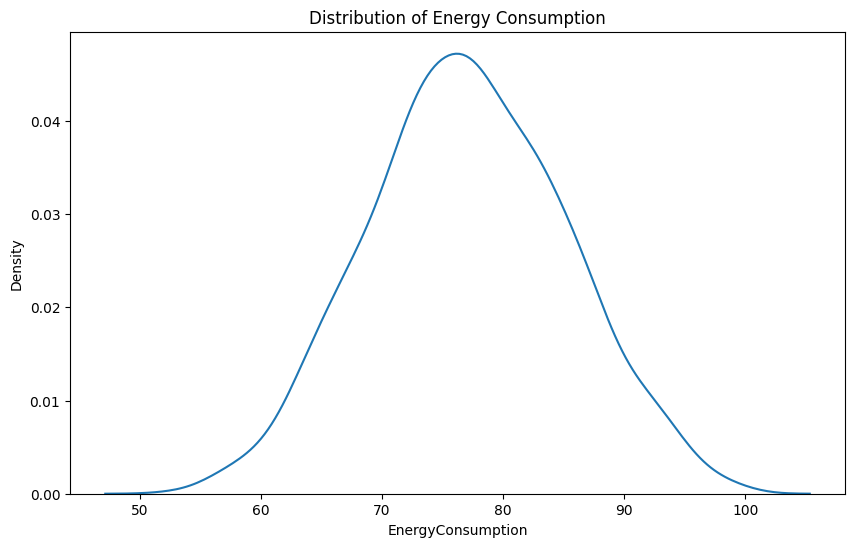

In [17]:
# Distribution of Energy Consumption
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df["EnergyConsumption"])
plt.title(f"Distribution of Energy Consumption")
plt.show()

In graph, we can see the high energy consume range is 70 to 90

Now let's what the relationship between temperature and Energy Consumption

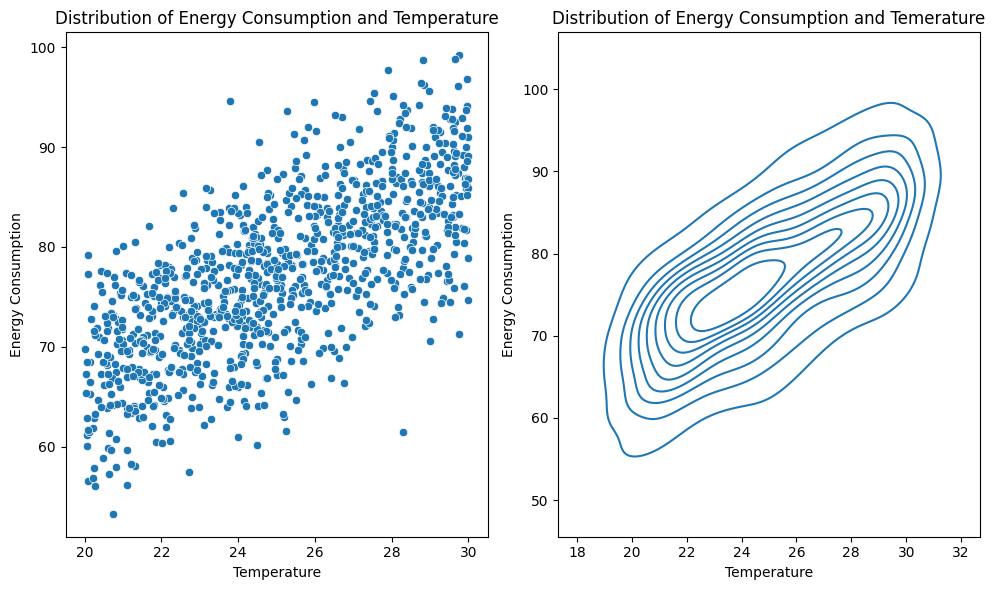

In [18]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df["Temperature"], y=df["EnergyConsumption"])
plt.xlabel("Temperature")
plt.ylabel("Energy Consumption")
plt.title(f"Distribution of Energy Consumption and Temperature")

plt.subplot(1, 2, 2)
sns.kdeplot(x=df["Temperature"], y=df["EnergyConsumption"])
plt.xlabel("Temperature")
plt.ylabel("Energy Consumption")
plt.title("Distribution of Energy Consumption and Temerature")

plt.tight_layout()
plt.show()

In the above graph, we can see that with temprature increasing it also increasing the energy consumption reason is that in heat weather we use most electricity like Freezer and Air Conditioner. In the second plot shape as contour because of two dimension and we can see tempreture spreading and the energy consumption is increasing

Now see energy consumption is higher on holiday or not

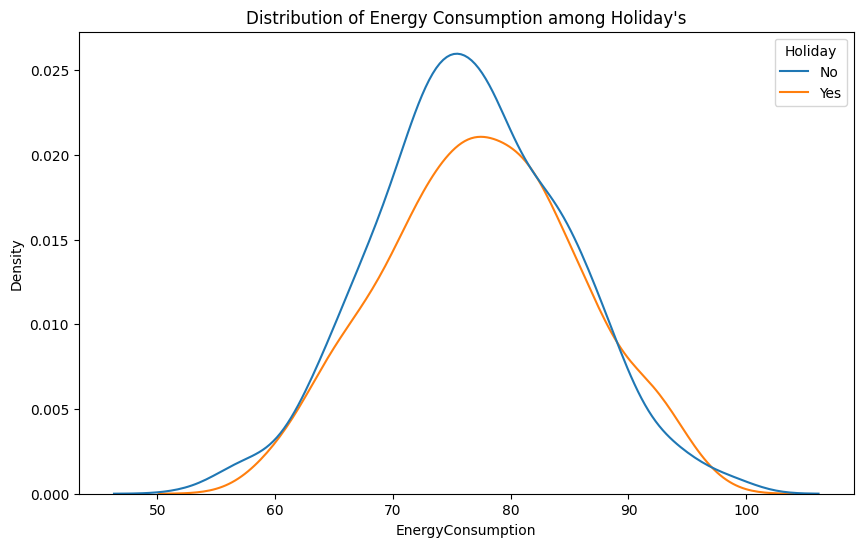

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df["EnergyConsumption"], hue=df["Holiday"])
plt.title(f"Distribution of Energy Consumption among Holiday's")
plt.show()

We can see in the graph that on holiday Energy Consumption is less than normal day. Reason - May be people busy at thier happiness and go out on trip with family.

Now see the energy Consumption during humidity

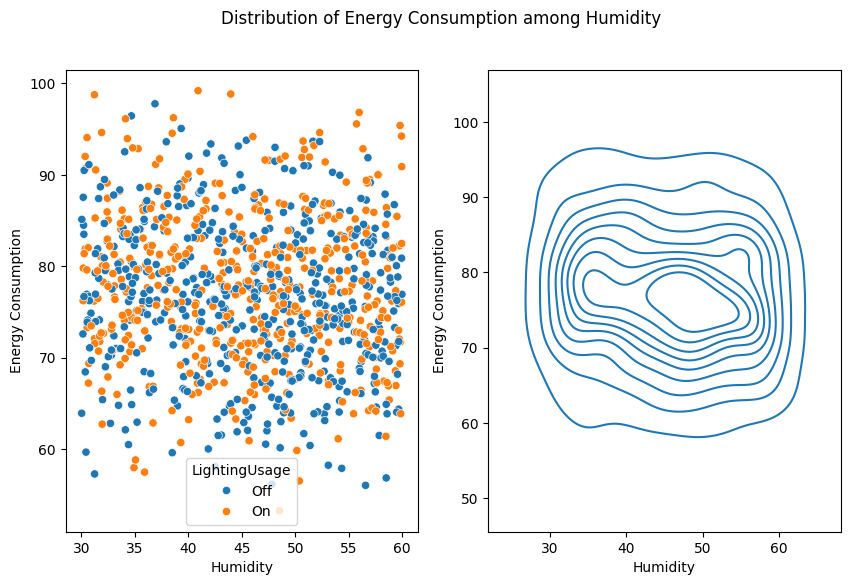

In [20]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df["Humidity"], y=df["EnergyConsumption"], hue=df["LightingUsage"])
plt.xlabel("Humidity")
plt.ylabel("Energy Consumption")

plt.subplot(1, 2, 2)
sns.kdeplot(x=df["Humidity"], y=df["EnergyConsumption"])
plt.xlabel("Humidity")
plt.ylabel("Energy Consumption")

plt.suptitle("Distribution of Energy Consumption among Humidity")
plt.show()

We can see in the graph, humidity and energy consumption haven't a linear relationship and spread out, so in my opinion they seem normal and look like energy consumption doesn't depend on humidity if humidity high or low. Reason - In my opinion, Society use energy on daily basis if humidity high or low

In [21]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


Now distribution of Renewable Energy among holiday and LightingUsage

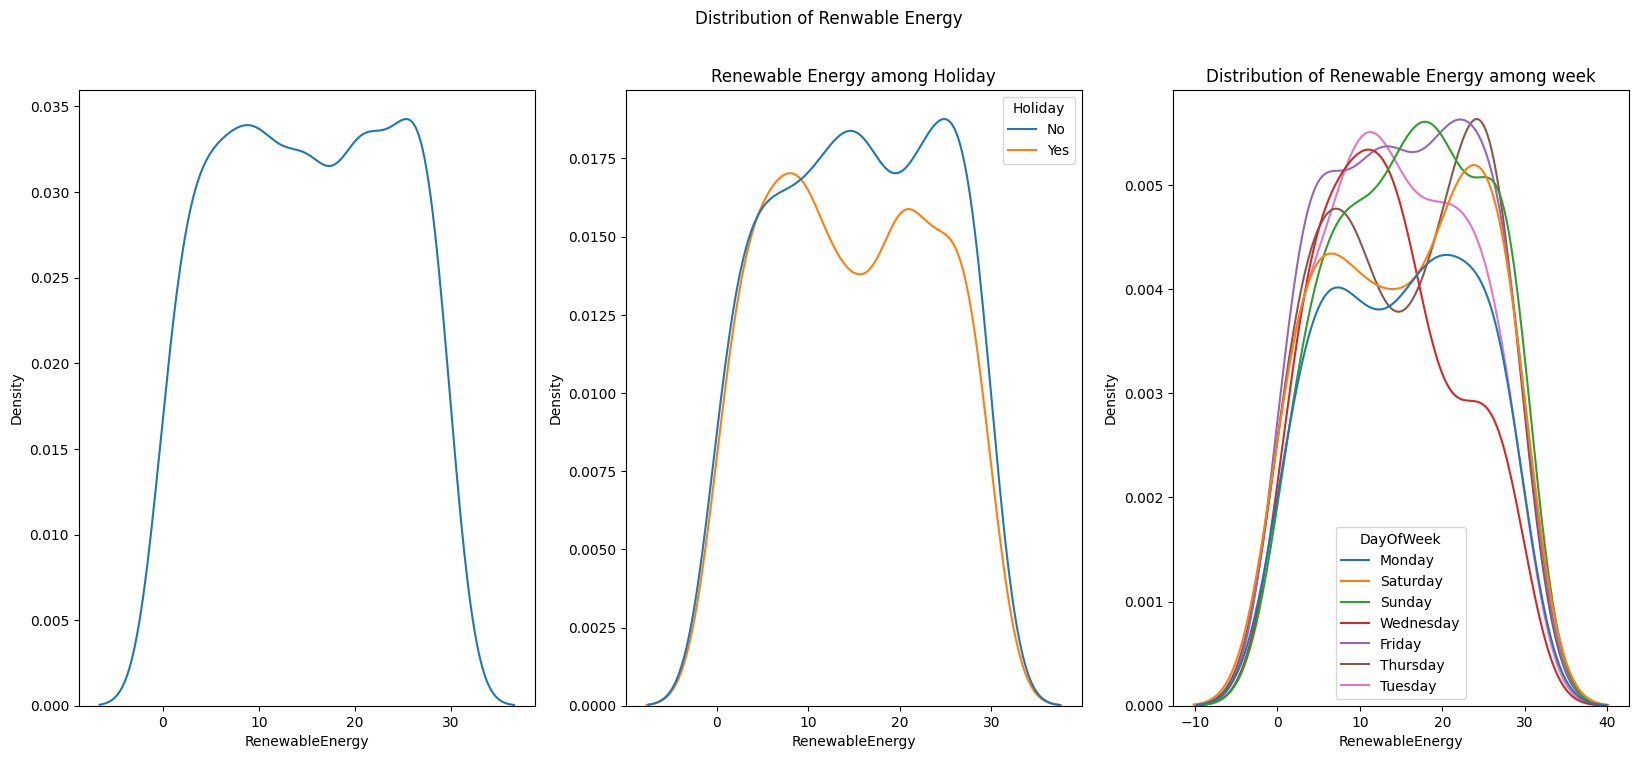

In [22]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.kdeplot(x=df["RenewableEnergy"])

plt.subplot(1, 3, 2)
sns.kdeplot(x=df["RenewableEnergy"], hue=df["Holiday"])
plt.title(f"Renewable Energy among Holiday")

plt.subplot(1, 3, 3)
sns.kdeplot(x=df["RenewableEnergy"], hue=df["DayOfWeek"])
plt.title(f"Distribution of Renewable Energy among week")

plt.suptitle(f"Distribution of Renwable Energy")
plt.show()

Now in above graph we can see that Renwable energy as maximize in the range of 10 to 20, and other graph we can see renewable energy produced more in on normal day than holiday. And third graph on monday renewable energy density is less than other days and on peak is Friday and thursday

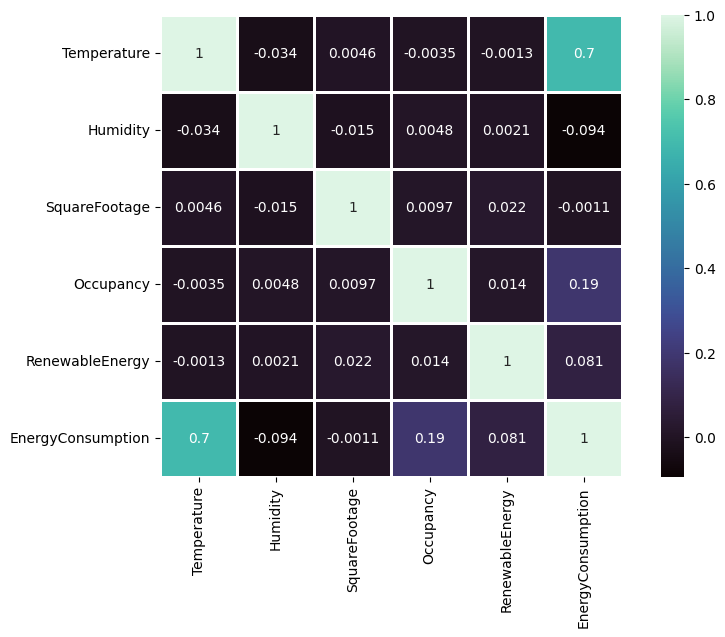

In [23]:
# Correlation Matrix
corr_ = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_, annot=True, linewidths=0.8, cmap=sns.color_palette("mako", as_cmap=True), square=True)
plt.show()

### Third Stage - Feature Engineering

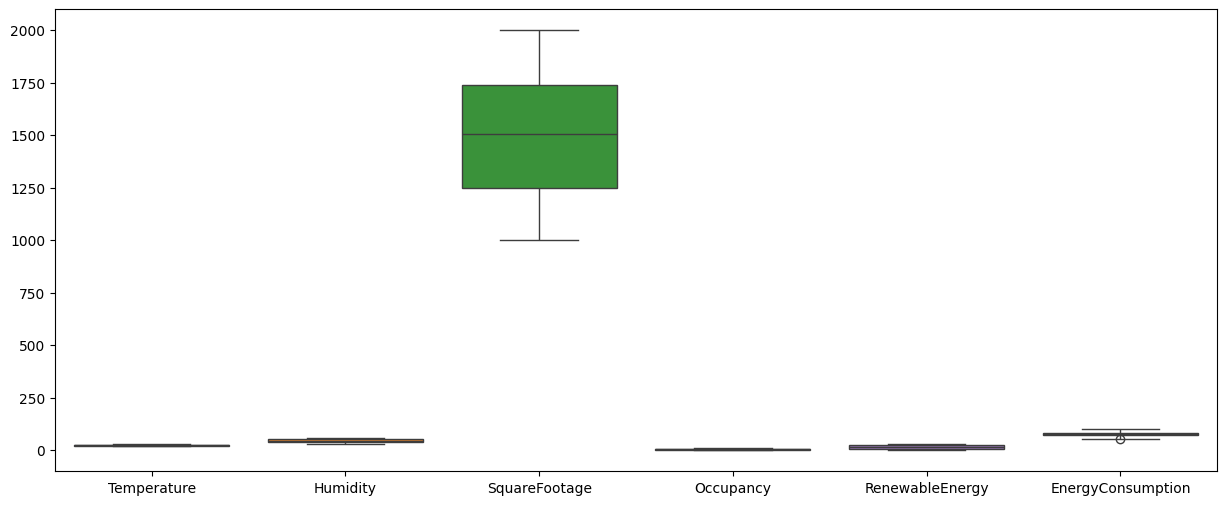

In [24]:
# Check the outliers

plt.figure(figsize=(15, 6))
sns.boxplot(df)
plt.show()

In [25]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [26]:
# Encoding the Categorical features
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in df.columns if df[feature].dtype not in [int, float]]
num_features = [feature for feature in df.columns if df[feature].dtype in [int, float]]


In [27]:
cat_features, num_features

(['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday'],
 ['Temperature',
  'Humidity',
  'SquareFootage',
  'Occupancy',
  'RenewableEnergy',
  'EnergyConsumption'])

In [28]:
encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore", dtype=int)

encoded_df = encoder.fit_transform(df[cat_features])

encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out(cat_features))

encoded_df = pd.concat([df, encoded_df], axis=1)

encoded_df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,HVACUsage_On,LightingUsage_On,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Holiday_Yes
0,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,1,0,1,0,0,0,0,0,0
1,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,1,1,0,1,0,0,0,0,0
2,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,0,0,0,0,1,0,0,0,0
3,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,0,1,0,0,0,0,0,1,0
4,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,1,0,0,0,0,0,0,0,0


In [29]:
# Remove Repeated Features 

encoded_df = encoded_df.drop(["HVACUsage", "LightingUsage", "DayOfWeek", "Holiday"], axis=1)

In [30]:
encoded_df.head()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,HVACUsage_On,LightingUsage_On,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Holiday_Yes
0,25.139433,43.431581,1565.693999,5,2.774699,75.364373,1,0,1,0,0,0,0,0,0
1,27.731651,54.225919,1411.064918,1,21.831384,83.401855,1,1,0,1,0,0,0,0,0
2,28.704277,58.907658,1755.715009,2,6.764672,78.270888,0,0,0,0,1,0,0,0,0
3,20.080469,50.371637,1452.316318,1,8.623447,56.519850,0,1,0,0,0,0,0,1,0
4,23.097359,51.401421,1094.130359,9,3.071969,70.811732,1,0,0,0,0,0,0,0,0


In [31]:
num_features.remove("Occupancy") # Because it has specific structure in the value

In [32]:
num_features.remove("EnergyConsumption")

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("EnergyConsumption", axis=1), df["EnergyConsumption"])

In [35]:
# Standardize the Dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train[num_features])
X_test = scaler.transform(X_test[num_features])

#### Model Training 

- Linear Regression
- Ridge Regression
- Decision Regressor
- RandomForest Regressor

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [37]:
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred_lr = lr.predict(X_test)

In [41]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr= np.sqrt(mse_lr)

print(f"R2 Score Linear : {r2_score_lr:.2f}%")
print(f"MSE Linear : {mse_lr}")
print(f"RMSE Linear : {rmse_lr}")

R2 Score Linear : 0.49%
MSE Linear : 32.84359470209037
RMSE Linear : 5.730933144095329


In [42]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [43]:
r2_score_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(f"R2 Score Ridge: {r2_score_ridge:.2f}%")
print(f"MSE Ridge : {mse_ridge}")
print(f"RMSE Ridge : {rmse_ridge}")

R2 Score Ridge: 0.49%
MSE Ridge : 32.84357385095037
RMSE Ridge : 5.730931324920093


In [60]:
from sklearn.tree import DecisionTreeRegressor

tree_ = DecisionTreeRegressor(max_depth=4)
tree_.fit(X_train, y_train)

y_pred_tree = tree_.predict(X_test)

In [61]:
r2_score_tree = r2_score(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print(f"R2 Score Tree : {r2_score_tree:.2f}%")
print(f"MSE Tree : {mse_tree}")
print(f"RMSE Tree : {rmse_tree}")

R2 Score Tree : 0.44%
MSE Tree : 36.510588035440755
RMSE Tree : 6.042399195306509


In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_ = RandomForestRegressor(n_estimators=100)

forest_.fit(X_train, y_train)

y_pred_forest = forest_.predict(X_test)

In [63]:
r2_score_forest = r2_score(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)

print(f"R2 Score Forest : {r2_score_forest:.2f}%")
print(f"MSE Forest: {mse_forest}")
print(f"RMSE Forest : {rmse_forest}")

R2 Score Forest : 0.43%
MSE Forest: 37.12836734498694
RMSE Forest : 6.093305124888047
